In [2]:
from scipy import io
from pyts.image import GramianAngularField 
import os
import datetime
import seaborn as sns
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [17]:
def load_battery(Data_Dir):
        
    mat_files = glob.glob(os.path.join(Data_Dir, '*.mat'))
    labels = [loadmat(mat_file) for mat_file in mat_files]
    dataset = []
    capacity_data = []
    counter = 0

    columns = ['Counter', 'BatteryLabel', 'AmbientTemperature', 'DateTime', 'Capacity', 'VoltageMeasured', 
               'CurrentMeasured', 'TemperatureMeasured', 'CurrentLoad', 'VoltageLoad', 'Time']
    
    for label in labels:
        for battery_key in ['B0005', 'B0006', 'B0007', 'B0008']:
            if battery_key in label:
                battery_data = label[battery_key][0, 0]  
                for i in range(len(battery_data['cycle'][0])):
                    row = battery_data['cycle'][0, i]
                    if row['type'][0] == 'discharge':
                        ambient_temperature = row['ambient_temperature'][0][0]
                        date_time = datetime.datetime(int(row['time'][0][0]), int(row['time'][0][1]), int(row['time'][0][2]), int(row['time'][0][3]), int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
                        data = row['data']
                        #print(data)
                        capacity = data[0][0]['Capacity'][0][0]
                        for j in range(len(data[0][0]['Voltage_measured'][0])):
                            voltage_measured = data[0][0]['Voltage_measured'][0][j]
                            current_measured = data[0][0]['Current_measured'][0][j]
                            temperature_measured = data[0][0]['Temperature_measured'][0][j]
                            current_load = data[0][0]['Current_load'][0][j]
                            voltage_load = data[0][0]['Voltage_load'][0][j]
                            time = data[0][0]['Time'][0][j]
                            dataset.append([counter + 1, battery_key, ambient_temperature, date_time, capacity,
                                        voltage_measured, current_measured,
                                        temperature_measured, current_load,
                                        voltage_load, time])
                        capacity_data.append([counter + 1, battery_key, ambient_temperature, date_time, capacity])
                        counter += 1
    return pd.DataFrame(dataset, columns=columns)

In [57]:
def calculate_soh(df, initial_capacity=2.0):
    df['SoH'] = (df['Capacity'] / initial_capacity) * 100
    return df

In [58]:
dir = '../Data/ARC1/'

In [59]:
df = load_battery(dir)

In [60]:
B0007 = df[df['BatteryLabel'] == "B0007"]

In [61]:
B0007.columns

Index(['Counter', 'BatteryLabel', 'AmbientTemperature', 'DateTime', 'Capacity',
       'VoltageMeasured', 'CurrentMeasured', 'TemperatureMeasured',
       'CurrentLoad', 'VoltageLoad', 'Time'],
      dtype='object')

In [62]:
B0007_final = calculate_soh(B0007)

/tmp/ipykernel_79576/2772042634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SoH'] = (df['Capacity'] / initial_capacity) * 100


Text(0.5, 1.0, 'SoH - B0007')

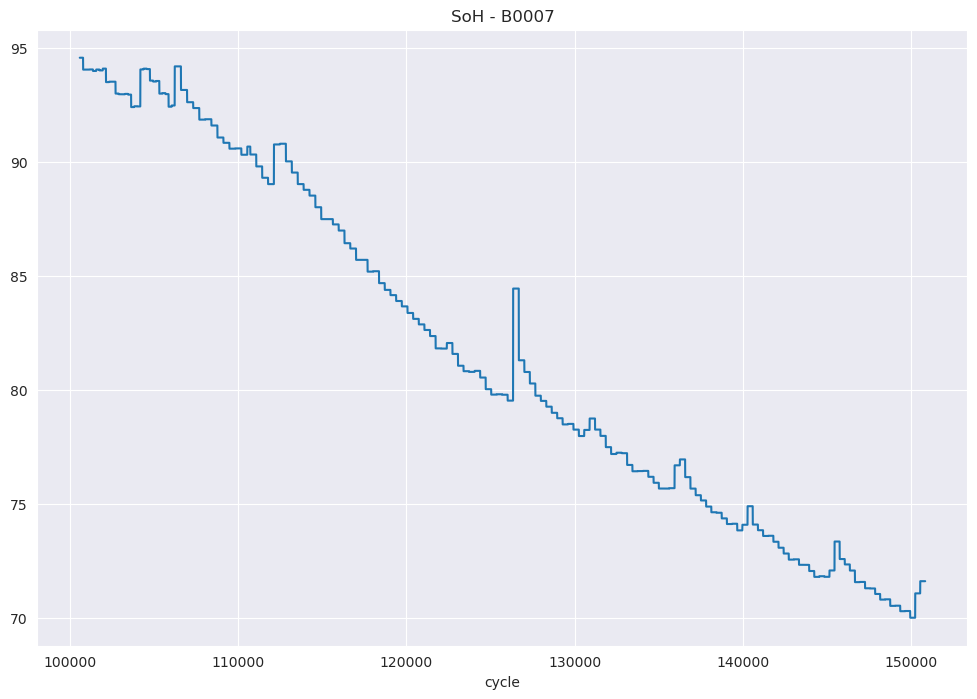

In [63]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(B0007['SoH'].index, B0007['SoH'])
plt.xlabel('cycle')
plt.title('SoH - B0007')

In [64]:
B0007

,Counter,BatteryLabel,AmbientTemperature,DateTime,Capacity,VoltageMeasured,CurrentMeasured,TemperatureMeasured,CurrentLoad,VoltageLoad,Time,SoH
100570,337,B0007,24,2008-04-02 15:25:41,1.891052,4.199360,-0.001866,23.937044,-0.0004,0.000,0.000,94.552615
100571,337,B0007,24,2008-04-02 15:25:41,1.891052,4.199497,-0.002139,23.924074,-0.0004,4.215,16.781,94.552615
100572,337,B0007,24,2008-04-02 15:25:41,1.891052,3.985606,-1.988778,24.004257,-2.0000,3.003,35.703,94.552615
100573,337,B0007,24,2008-04-02 15:25:41,1.891052,3.963247,-1.992558,24.162868,-2.0000,2.987,53.781,94.552615
100574,337,B0007,24,2008-04-02 15:25:41,1.891052,3.946647,-1.988491,24.346368,-2.0000,2.972,71.922,94.552615
...,...,...,...,...,...,...,...,...,...,...,...,...
150850,504,B0007,24,2008-05-27 20:45:42,1.432455,3.336677,-0.002464,38.744012,0.0006,0.001,2781.312,71.622764
150851,504,B0007,24,2008-05-27 20:45:42,1.432455,3.349952,-0.005358,38.462399,0.0006,0.001,2791.062,71.622764
150852,504,B0007,24,2008-05-27 20:45:42,1.432455,3.362104,-0.003906,38.246805,0.0006,0.001,2800.828,71.622764
150853,504,B0007,24,2008-05-27 20:45:42,1.432455,3.373357,-0.002763,37.970504,0.0006,0.001,2810.640,71.622764
